In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zooming_regret = np.loadtxt('zooming.csv')
zooming_regret_delta = np.loadtxt('zooming_delta.csv')

bmo_zooming_regret = np.loadtxt('bmoz.csv')
bmo_zooming_regret_delta = np.loadtxt('bmoz_delta.csv')

bmo_p_regret = np.loadtxt('bmop.csv')
bmo_p_regret_delta = np.loadtxt('bmop_delta.csv')

bmo_eli_regret = np.loadtxt('bmo_eli.csv')
bmo_eli_regret_delta = np.loadtxt('bmo_eli_delta.csv')


In [3]:
c_scale = 1
zooming_m, zooming_v = np.mean(np.cumsum(zooming_regret, axis=1), axis=0), np.std(np.cumsum(zooming_regret, axis=1), axis=0) * c_scale
bmoz_m, bmoz_v = np.mean(np.cumsum(bmo_zooming_regret, axis=1), axis=0), np.std(np.cumsum(bmo_zooming_regret, axis=1), axis=0) * c_scale
bmoe_m, bmoe_v = np.mean(np.cumsum(bmo_eli_regret, axis=1), axis=0), np.std(np.cumsum(bmo_eli_regret, axis=1), axis=0) * c_scale
bmop_m, bmop_v = np.mean(np.cumsum(bmo_p_regret, axis=1), axis=0), np.std(np.cumsum(bmo_p_regret, axis=1), axis=0) * c_scale

zooming_m_d, zooming_v_d = np.mean(np.cumsum(zooming_regret_delta, axis=1), axis=0), np.std(np.cumsum(zooming_regret_delta, axis=1), axis=0) * c_scale
bmoz_m_d, bmoz_v_d = np.mean(np.cumsum(bmo_zooming_regret_delta, axis=1), axis=0), np.std(np.cumsum(bmo_zooming_regret_delta, axis=1), axis=0) * c_scale
bmoe_m_d, bmoe_v_d = np.mean(np.cumsum(bmo_eli_regret_delta, axis=1), axis=0), np.std(np.cumsum(bmo_eli_regret_delta, axis=1), axis=0) * c_scale
bmop_m_d, bmop_v_d = np.mean(np.cumsum(bmo_p_regret_delta, axis=1), axis=0), np.std(np.cumsum(bmo_p_regret_delta, axis=1), axis=0) * c_scale

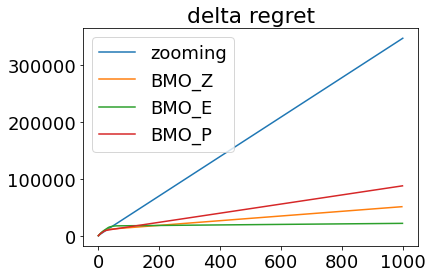

In [9]:
plt.plot(zooming_m_d, label='zooming')
plt.plot(bmoz_m_d, label='BMO_Z')
plt.plot(bmoe_m_d, label='BMO_E')
plt.plot(bmop_m_d, label='BMO_P')
plt.legend()
plt.title('delta regret')
plt.savefig('./bmo_deltaregret.png', dpi=200)
plt.show()

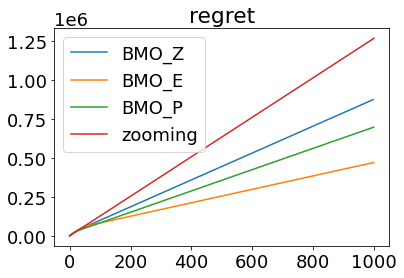

In [10]:
plt.plot(bmoz_m, label='BMO_Z')
plt.plot(bmoe_m, label='BMO_E')
plt.plot(bmop_m, label='BMO_P')
plt.plot(zooming_m, label='zooming')
plt.legend()
plt.title('regret')
plt.savefig('./bmo_regret.png', dpi=200)
plt.show()

# std

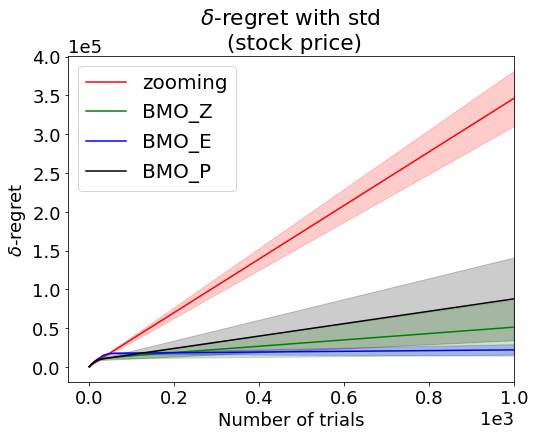

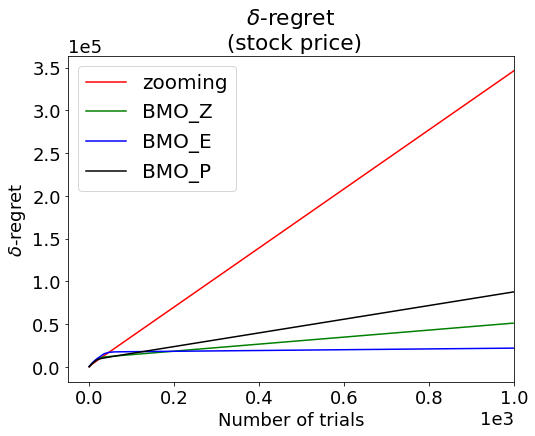

In [11]:
plt.figure(figsize = (8,6))
plt.rcParams['font.size'] = 18
c_scale = 0.5

zooming_m_d, zooming_v_d = np.mean(np.cumsum(zooming_regret_delta, axis=1), axis=0), \
            (np.std(np.cumsum(zooming_regret_delta, axis=1), axis=0) * c_scale)
bmoz_m_d, bmoz_v_d = np.mean(np.cumsum(bmo_zooming_regret_delta, axis=1), axis=0), \
            (np.std(np.cumsum(bmo_zooming_regret_delta, axis=1), axis=0) * c_scale)
bmoe_m_d, bmoe_v_d = np.mean(np.cumsum(bmo_eli_regret_delta, axis=1), axis=0), \
            (np.std(np.cumsum(bmo_eli_regret_delta, axis=1), axis=0) * c_scale)
bmop_m_d, bmop_v_d = np.mean(np.cumsum(bmo_p_regret_delta, axis=1), axis=0), \
            (np.std(np.cumsum(bmo_p_regret_delta, axis=1), axis=0) * c_scale)


alpha=0.2
dic_color = {
    'zooming': 'r',
    'bmo_z': 'g',
    'bmo_e': 'b',
    'bmo_p': 'k'
}

plt.plot(zooming_m_d, color=dic_color['zooming'], label='zooming')
plt.fill_between(np.array(range(len(zooming_m_d))), zooming_m_d-zooming_v_d, 
                 zooming_m_d+zooming_v_d, color=dic_color['zooming'], alpha=alpha)



plt.plot(bmoz_m_d, color=dic_color['bmo_z'], label='BMO_Z')
plt.fill_between(np.array(range(len(bmoz_m_d))), bmoz_m_d-bmoz_v_d, 
                 bmoz_m_d+bmoz_v_d, color=dic_color['bmo_z'], alpha=alpha)


plt.plot(bmoe_m_d, color=dic_color['bmo_e'], label='BMO_E')

plt.fill_between(np.array(range(len(bmoe_m_d))), bmoe_m_d-bmoe_v_d, 
                 bmoe_m_d+bmoe_v_d, color=dic_color['bmo_e'], alpha=alpha)



plt.plot(bmop_m_d, color=dic_color['bmo_p'], label='BMO_P')
plt.fill_between(np.array(range(len(bmop_m_d))), bmop_m_d-bmop_v_d, 
                 bmop_m_d+bmop_v_d, color=dic_color['bmo_p'], alpha=alpha)


plt.xlim(right=1000)
# plt.ylim(top=4e5)
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.legend(fontsize=20, loc=2)
plt.title('$\delta$-regret with std \n (stock price)')
plt.ylabel('$\delta$-regret')
plt.xlabel('Number of trials')
plt.savefig('./bmo_std.png', dpi=200)
plt.show()



#-----------
plt.figure(figsize = (8,6))
plt.rcParams['font.size'] = 18
plt.plot(zooming_m_d, color=dic_color['zooming'], label='zooming')
plt.plot(bmoz_m_d, color=dic_color['bmo_z'], label='BMO_Z')
plt.plot(bmoe_m_d, color=dic_color['bmo_e'], label='BMO_E')
plt.plot(bmop_m_d, color=dic_color['bmo_p'], label='BMO_P')
plt.xlim(right=1000)
# plt.ylim(top=4e5)
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.legend(fontsize=20, loc=2)
plt.title('$\delta$-regret \n (stock price)')
plt.ylabel('$\delta$-regret')
plt.xlabel('Number of trials')
plt.savefig('./bmo_mean.png', dpi=200)
plt.show()

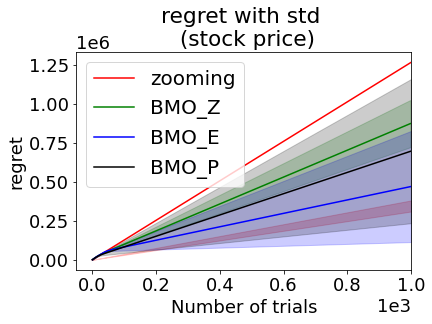

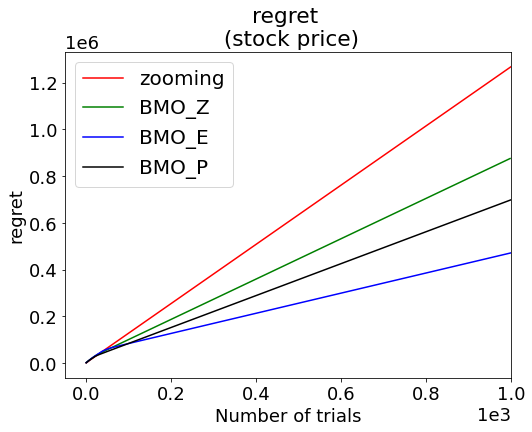

In [12]:
plt.plot(zooming_m, color=dic_color['zooming'], label='zooming')
plt.fill_between(np.array(range(len(zooming_m_d))), zooming_m_d-zooming_v_d, 
                 zooming_m_d+zooming_v_d, color=dic_color['zooming'], alpha=alpha)


plt.plot(bmoz_m, color=dic_color['bmo_z'], label='BMO_Z')
plt.fill_between(np.array(range(len(bmoz_m))), bmoz_m-bmoz_v, 
                 bmoz_m+bmoz_v, color=dic_color['bmo_z'], alpha=alpha)


plt.plot(bmoe_m, color=dic_color['bmo_e'], label='BMO_E')
plt.fill_between(np.array(range(len(bmoe_m))), bmoe_m-bmoe_v, 
                 bmoe_m+bmoe_v, color=dic_color['bmo_e'], alpha=alpha)


plt.plot(bmop_m, color=dic_color['bmo_p'], label='BMO_P')
plt.fill_between(np.array(range(len(bmop_m))), bmop_m-bmop_v, 
                 bmop_m+bmop_v, color=dic_color['bmo_p'], alpha=alpha)


plt.xlim(right=1000)
# plt.ylim(top=4e5)
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.legend(fontsize=20, loc=2)
plt.title('regret with std \n (stock price)')
plt.ylabel('regret')
plt.xlabel('Number of trials')
plt.savefig('./bmo_std.png', dpi=200)
plt.show()


#-----------
plt.figure(figsize = (8,6))
plt.rcParams['font.size'] = 18
plt.plot(zooming_m, color=dic_color['zooming'], label='zooming')
plt.plot(bmoz_m, color=dic_color['bmo_z'], label='BMO_Z')
plt.plot(bmoe_m, color=dic_color['bmo_e'], label='BMO_E')
plt.plot(bmop_m, color=dic_color['bmo_p'], label='BMO_P')
plt.xlim(right=1000)
# plt.ylim(top=4e5)
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.legend(fontsize=20, loc=2)
plt.title('regret \n (stock price)')
plt.ylabel('regret')
plt.xlabel('Number of trials')
plt.savefig('./bmo_mean.png', dpi=200)
plt.show()